In [91]:
import time
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from textblob.blob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

import datetime
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import os
from os import path
from PIL import Image

import nltk
from nrclex import NRCLex

from nltk.corpus import stopwords

plt.rc('figure',figsize=(17,13))
import plotly as p
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

import re
import pandas as pd

Youtube comments are dynamically loaded
>So, we need a loop that should: 
1. Scroll down
2. Wait for comments to appear
3. Scrape them
4. Repeat till the given range

In [92]:
'''def Scrape(url):
    authors = []
    try:
        options = webdriver.ChromeOptions()
        options.add_argument('-headless')
        options.add_argument('-no-sandbox')
        options.add_argument('-disable-dev-shm-usage')
        
        driver = webdriver.Chrome('D:\chromedriver.exe', chrome_options=options)
        wait = WebDriverWait(driver,15)
        driver.get(url)
        
        for item in range(6):
            wait.until(EC.visibility_of_element_located(By.TAG_NAME,"body")).send_keys(Keys.END)
            time.sleep(5)
        
        for author in wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"style-scope ytd-comment-renderer"))):
            authors.append(author.text)
            
    except Exception as e:
        print(e)
    return authors

if __name__ == '__main__':
    url = "https://www.youtube.com/watch?v=wRH_YJTMHoM&ab_channel=IreneVanLaar"
    data=Scrape(url)
    data'''

'def Scrape(url):\n    authors = []\n    try:\n        options = webdriver.ChromeOptions()\n        options.add_argument(\'-headless\')\n        options.add_argument(\'-no-sandbox\')\n        options.add_argument(\'-disable-dev-shm-usage\')\n        \n        driver = webdriver.Chrome(\'D:\\chromedriver.exe\', chrome_options=options)\n        wait = WebDriverWait(driver,15)\n        driver.get(url)\n        \n        for item in range(6):\n            wait.until(EC.visibility_of_element_located(By.TAG_NAME,"body")).send_keys(Keys.END)\n            time.sleep(5)\n        \n        for author in wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"style-scope ytd-comment-renderer"))):\n            authors.append(author.text)\n            \n    except Exception as e:\n        print(e)\n    return authors\n\nif __name__ == \'__main__\':\n    url = "https://www.youtube.com/watch?v=wRH_YJTMHoM&ab_channel=IreneVanLaar"\n    data=Scrape(url)\n    data'

In [93]:
data=[] 
with Chrome(executable_path=r'D:\chromedriver.exe') as driver: 
    wait = WebDriverWait(driver,15) 
    driver.get("https://www.youtube.com/watch?v=5A-F9qu6c_4&ab_channel=VirDasCOMEDY")  #access the url
    for item in range(10): 
         #scroll down and wait until everything is visible
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(4) 
    
    #scrape comments
    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        data.append(comment.text)
        
data

['I come from an India where comedians talk reality and politicians do comedy.',
 "People loving this and people hating this just proves the whole damn point of 'Two Indias'",
 'I come from an India , where every one needs a change , and no one leads a change !!',
 'THAT India that you are proud of is also proud of you for spitting facts despite knowing that these 75 year old leaders and their followers are gonna pounce on you the moment this video hits the web. Kudos to you!',
 'As music starts, everything you said keeps running in mind and as it ends, ask which India we  want.. 🇮🇳',
 'I come from an India where we fight hard for the justice of a celebrity and yet I come from an India where crores of cases are pending.',
 'i come from an india where \'\'log kya kahenge" has more value than one\'s feelings and emotions..',
 "I haven't seen anyone who have that much courage to speak Truth.",
 "I have always loved you idk why but yes and each and every word is true I'm really proud of yo

In [94]:
df = pd.DataFrame(data , columns=['comment'])
df.head()

,comment
0,I come from an India where comedians talk real...
1,People loving this and people hating this just...
2,"I come from an India , where every one needs a..."
3,THAT India that you are proud of is also proud...
4,"As music starts, everything you said keeps run..."


In [95]:
df.shape

(199, 1)

In [96]:
def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'&amp', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    
    return text

df['comment'] = df['comment'].apply(lambda x:clean(x))


In [97]:
df

,comment
0,i come from an india where comedians talk real...
1,people loving this and people hating this just...
2,i come from an india where every one needs a...
3,that india that you are proud of is also proud...
4,as music starts everything you said keeps run...
...,...
194,children s living in basement have more courag...
195,only one word came to mind throughout the vide...
196,we appreciate what you have spoken in kennedy ...
197,they all kept clapping for more than ...


In [98]:
df.to_csv('coments100.csv', index=False)  

In [99]:
df = pd.read_csv('coments100.csv')
df

,comment
0,i come from an india where comedians talk real...
1,people loving this and people hating this just...
2,i come from an india where every one needs a...
3,that india that you are proud of is also proud...
4,as music starts everything you said keeps run...
...,...
194,children s living in basement have more courag...
195,only one word came to mind throughout the vide...
196,we appreciate what you have spoken in kennedy ...
197,they all kept clapping for more than ...


In [100]:
df.drop_duplicates()

,comment
0,i come from an india where comedians talk real...
1,people loving this and people hating this just...
2,i come from an india where every one needs a...
3,that india that you are proud of is also proud...
4,as music starts everything you said keeps run...
...,...
194,children s living in basement have more courag...
195,only one word came to mind throughout the vide...
196,we appreciate what you have spoken in kennedy ...
197,they all kept clapping for more than ...


In [101]:
print(df[df['comment'].map(len)==0])
#there arent any blank comments

Empty DataFrame
Columns: [comment]
Index: []


In [102]:
df['comment'][0]

'i come from an india where comedians talk reality and politicians do comedy '

In [103]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['comment'] = df['comment'].apply(remove_stopwords)

# Using TextBlob

In [104]:
# finding subjectivity

def subj(text):
    return TextBlob(text).sentiment.subjectivity

def applyonall(df):
    df['Subjectivity'] = df['comment'].apply(subj)
    return df

df = applyonall(df)

df

,comment,Subjectivity
0,come india comedians talk reality politicians ...,0.000000
1,people loving people hating proves whole damn ...,0.450000
2,come india every one needs change one lead...,0.000000
3,india proud also proud spitting facts despite ...,0.733333
4,music starts everything said keeps running mi...,0.000000
...,...,...
194,children living basement courage man living sk...,0.000000
195,one word came mind throughout video wow powe...,0.911111
196,appreciate spoken kennedy center,0.100000
197,kept clapping sec amazing,0.750000


In [105]:

#finind polarity

def polar(text):
    return TextBlob(text).sentiment.polarity

def applypolarfunc(df):
    df["Polarity"] = df['comment'].apply(polar)
    return df

df = applypolarfunc(df)

df

,comment,Subjectivity,Polarity
0,come india comedians talk reality politicians ...,0.000000,0.000000
1,people loving people hating proves whole damn ...,0.450000,0.366667
2,come india every one needs change one lead...,0.000000,0.000000
3,india proud also proud spitting facts despite ...,0.733333,0.566667
4,music starts everything said keeps running mi...,0.000000,0.000000
...,...,...,...
194,children living basement courage man living sk...,0.000000,0.000000
195,one word came mind throughout video wow powe...,0.911111,0.277778
196,appreciate spoken kennedy center,0.100000,-0.100000
197,kept clapping sec amazing,0.750000,0.250000


In [106]:
analysis = lambda polarity: 'Positive' if polarity>0 else 'Neutral' if polarity == 0 else 'Negative'

def analysis_polarity(df):
    df['Analysis'] = df['Polarity'].apply(analysis)
    return df
df = analysis_polarity(df)
df

,comment,Subjectivity,Polarity,Analysis
0,come india comedians talk reality politicians ...,0.000000,0.000000,Neutral
1,people loving people hating proves whole damn ...,0.450000,0.366667,Positive
2,come india every one needs change one lead...,0.000000,0.000000,Neutral
3,india proud also proud spitting facts despite ...,0.733333,0.566667,Positive
4,music starts everything said keeps running mi...,0.000000,0.000000,Neutral
...,...,...,...,...
194,children living basement courage man living sk...,0.000000,0.000000,Neutral
195,one word came mind throughout video wow powe...,0.911111,0.277778,Positive
196,appreciate spoken kennedy center,0.100000,-0.100000,Negative
197,kept clapping sec amazing,0.750000,0.250000,Positive


In [107]:
def print_pos():
    sortedDF = df.sort_values(by=['Polarity'])
    for i in range(sortedDF.shape[0]):
        if sortedDF['Analysis'][i] == 'Negative':
            print(str(i+1)+'>'+sortedDF['comment'][i])
            print()
print_pos()

6>come india fight hard justice celebrity yet come india crores cases pending 

16>people angry poem  recited outside india  logically speaking going outside india   say  come india        

17>controversial thing said india  told truth  leaders unhappy 

21> one hated speaks truth    plato

22>would attend school college everyday social teacherplot twist   repeal   farm law

26> society drifts truth  hate speak    george orwell

27>path righteousness brutal everyone walk

47>thankyou bringing problems noone willing courage talk    ik suffer lot hate got back 

48>came controversy  first thoughts  saying bad things india international level  watching video thinking moment  agree veer das comment 

49>come india embraces freedom also come india ones speak mind point country shortcomings oppressed harder anyone else

62>guy said actually correct  especially part blue green orange   

65>came watch video knowing  controversy       came mindset hate content     watched     really loved    

In [108]:
temp = df.groupby('Analysis').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Analysis,comment
2,Positive,116
1,Neutral,52
0,Negative,31


In [109]:
Positive_tweet = df[df['Analysis']=='Positive'].reset_index()
Negative_tweet = df[df['Analysis']=='Negative'].reset_index()
Neutral_tweet = df[df['Analysis']=='Neutral'].reset_index()

In [110]:
Negative_tweet

,index,comment,Subjectivity,Polarity,Analysis
0,5,come india fight hard justice celebrity yet co...,0.541667,-0.291667,Negative
1,15,people angry poem recited outside india logi...,0.337500,-0.062500,Negative
2,16,controversial thing said india told truth le...,0.925000,-0.025000,Negative
3,20,one hated speaks truth plato,0.700000,-0.900000,Negative
4,21,would attend school college everyday social te...,0.333333,-0.083333,Negative
5,25,society drifts truth hate speak george or...,0.900000,-0.800000,Negative
6,26,path righteousness brutal everyone walk,1.000000,-0.875000,Negative
7,46,thankyou bringing problems noone willing coura...,0.550000,-0.183333,Negative
8,47,came controversy first thoughts saying bad t...,0.333333,-0.150000,Negative
9,48,come india embraces freedom also come india on...,0.000000,-0.100000,Negative


<Figure size 576x432 with 0 Axes>

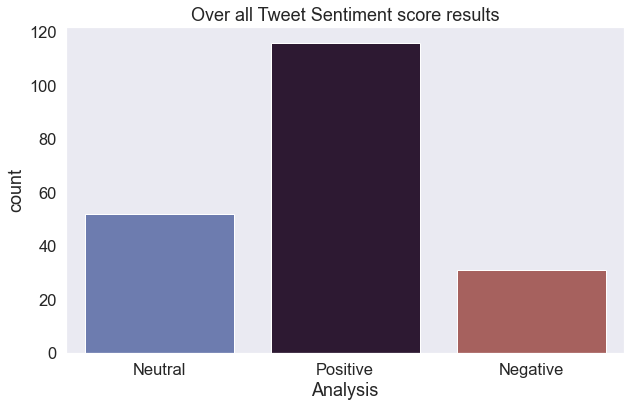

In [111]:
plt.figure(figsize=(8,6))

fig = go.Figure(go.Funnelarea(
    text =temp.Analysis,
    values = temp.comment,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(df['Analysis'],palette='twilight')
plt.title('Over all Tweet Sentiment score results');

In [112]:
words=[]
    
for index, row in Positive_tweet.iterrows():
    words.append(row['comment'].split())
    
all_positive_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_positive_words.append(i)  
            
removeNestings(words)    

all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts()[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()

In [113]:
words=[]
for index, row in Negative_tweet.iterrows():
    words.append(row['comment'].split())
    
    
all_negative_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_negative_words.append(i)  
            
removeNestings(words)    

all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts()[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()

In [114]:
words=[]
for index, row in Neutral_tweet.iterrows():
    words.append(row['comment'].split())
    
    
all_neutral_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_neutral_words.append(i)  
            
removeNestings(words)    

all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts()[:70].rename_axis('Common neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common neutral Words'], values='count',title='70 Most Common Words In neutral Tweets')
fig.show()

In [115]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='Top 30 Unique Words In Negative Tweets')
fig.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='Top 30 Unique Words In Positive Tweets')
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='Top 30 Unique Words In Neutral Tweets')
fig.show()

# Using NLTK (emotion analysis NRClex())

In [116]:
df['comment'] = df['comment'].str.strip()

In [117]:

def emo_tweet(word):
    word = [word for word in word if word not in stopwords.words('english')]
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

In [118]:
Overall_tweet_emo = emo_tweet(df['comment'])

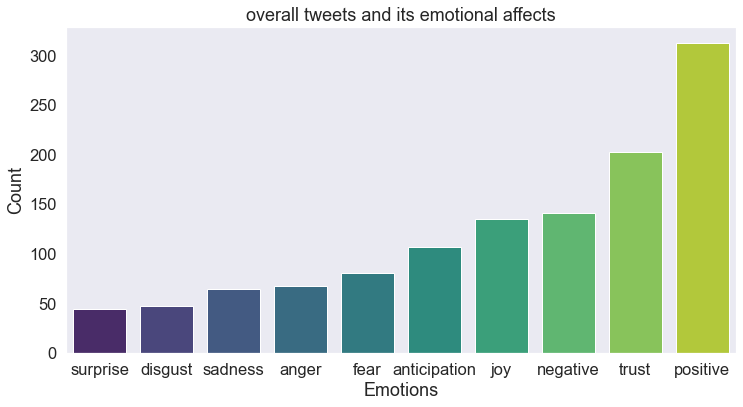

In [119]:
plt.figure(figsize=(12,6))
plt.title('overall tweets and its emotional affects')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.0)
sns.barplot(x='Emotions',y='Count',data = Overall_tweet_emo[0:],palette='viridis');

# Using Vader
- It's specifically attuned to sentiments expressed in social media
- Does not require any training data
- Fast
- no speed-preformance tradeoff


In [120]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [121]:
sid = SentimentIntensityAnalyzer()

data = pd.read_csv('coments100.csv')

In [122]:

data['Sentiment_scores'] = data['comment'].apply(lambda comment: sid.polarity_scores(comment))

data['compound'] = data['Sentiment_scores'].apply(lambda x:x['compound'])

data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score >=0.05 else "neg" if score <= -0.05  else 'neut' )


In [123]:
data

,comment,Sentiment_scores,compound,sentiment
0,i come from an india where comedians talk real...,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.5719,pos
1,people loving this and people hating this just...,"{'neg': 0.262, 'neu': 0.568, 'pos': 0.17, 'com...",-0.2732,neg
2,i come from an india where every one needs a...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2960,neg
3,that india that you are proud of is also proud...,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.8591,pos
4,as music starts everything you said keeps run...,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.0772,pos
...,...,...,...,...
194,children s living in basement have more courag...,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.5413,pos
195,only one word came to mind throughout the vide...,"{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.8720,pos
196,we appreciate what you have spoken in kennedy ...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.4019,pos
197,they all kept clapping for more than ...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.5859,pos


In [124]:
temp = data.groupby('sentiment').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,comment
2,pos,141
0,neg,40
1,neut,18


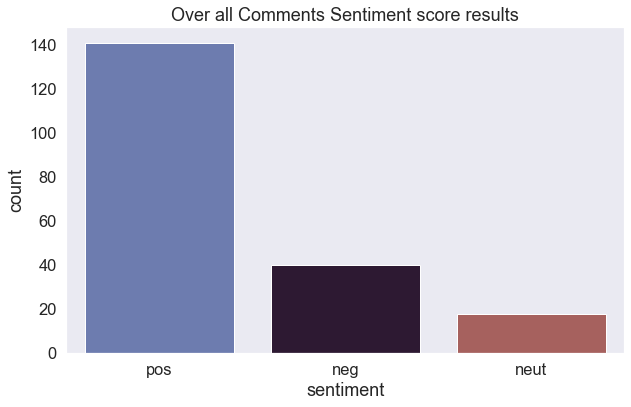

In [125]:
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(data['sentiment'],palette='twilight')
plt.title('Over all Comments Sentiment score results');

<AxesSubplot:xlabel='compound'>

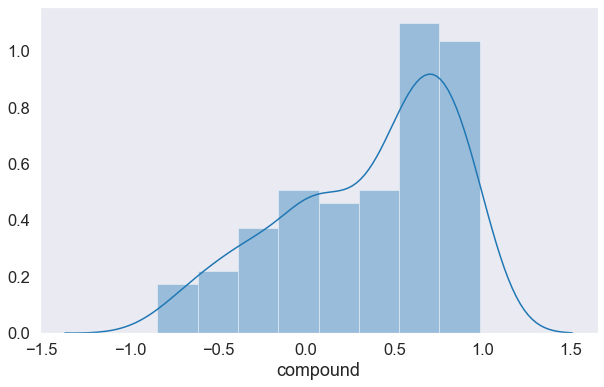

In [129]:
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.distplot(data['compound'])

What if i clean the dataset?

In [134]:
def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'&amp', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    
    return text


data['comment'] = data['comment'].apply(lambda x:clean(x))

In [135]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['comment'] = data['comment'].apply(remove_stopwords)


In [136]:

data['Sentiment_scores'] = data['comment'].apply(lambda comment: sid.polarity_scores(comment))

data['compound'] = data['Sentiment_scores'].apply(lambda x:x['compound'])

data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score >=0.05 else "neg" if score <= -0.05  else 'neut' )


In [137]:
temp = data.groupby('sentiment').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,comment
2,pos,141
0,neg,35
1,neut,23


Wellnot much of a difference, i think all the punctuation, emojis, are important cz it affects the vader analyzer 